# Task: To predict patient glucose levels using a Keras-based neural network.

### Original data: https://data.world/uci/pima-indians-diabetes

## Install TensorFlow

In [1]:
devtools::install_github("rstudio/tensorflow")

Skipping install of 'tensorflow' from a github remote, the SHA1 (07412bfa) has not changed since last install.
  Use `force = TRUE` to force installation


## Install Keras

In [2]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (63eddea2) has not changed since last install.
  Use `force = TRUE` to force installation


## Load libraries

In [3]:
library(tensorflow)
#install_tensorflow()
library(keras)

In [4]:
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


## Load dataset

In [5]:
diabetes1<-read.csv("pima-indians-diabetes1.csv")
attach(diabetes1)

In [6]:
diabetes1

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
9,78,25,0,31.6,0.280,38,0,72
0,70,0,0,37.9,0.334,28,1,146
0,80,0,0,32.4,0.601,27,0,91
0,70,38,0,33.2,0.170,22,0,137
3,70,30,328,35.5,0.344,35,1,158
13,70,0,0,34.2,0.251,52,0,106
2,70,99,0,34.7,0.575,62,1,197
3,86,27,156,33.3,1.154,52,1,176
10,68,0,0,31.2,0.258,41,0,122


# Feature Selection

### As we have already seen, the purpose of feature selection is to identify the features that have the most impact on the dependent variable and remove redundant features.

### The following link also contains further information on feature selection techniques for this dataset. (https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/).

### This example is slightly different because feature selection is being conducted for a regression - rather than a classification problem.

## Correlation Plot

### Features that are overly correlated with each other are assumed redundant and should be removed from the model.

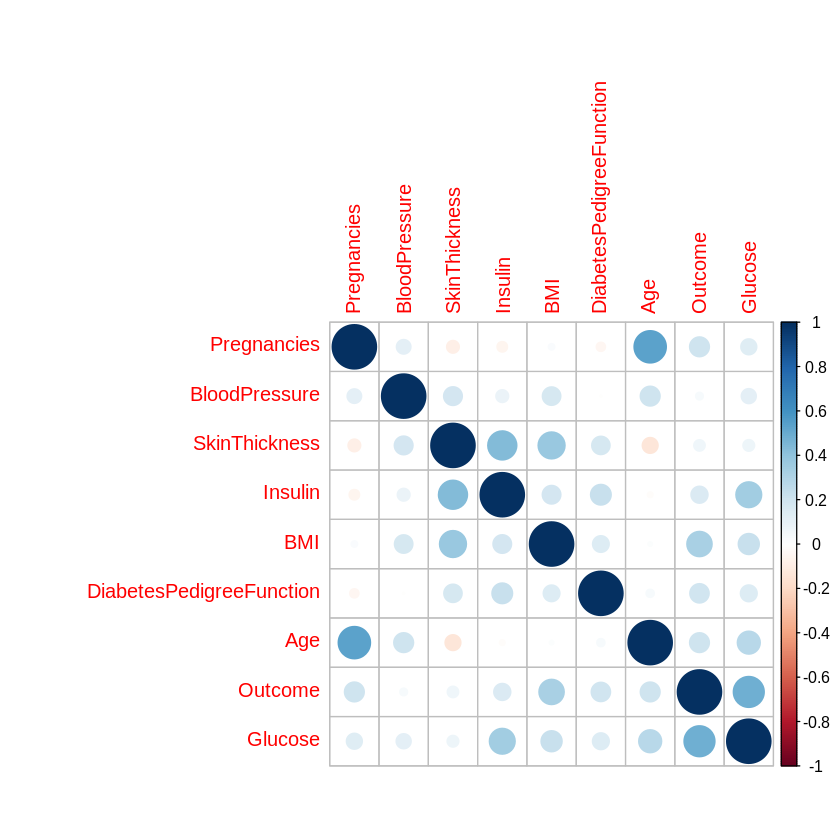

In [7]:
M <- cor(diabetes1)
corrplot(M, method = "circle")

## Display correlation coefficients

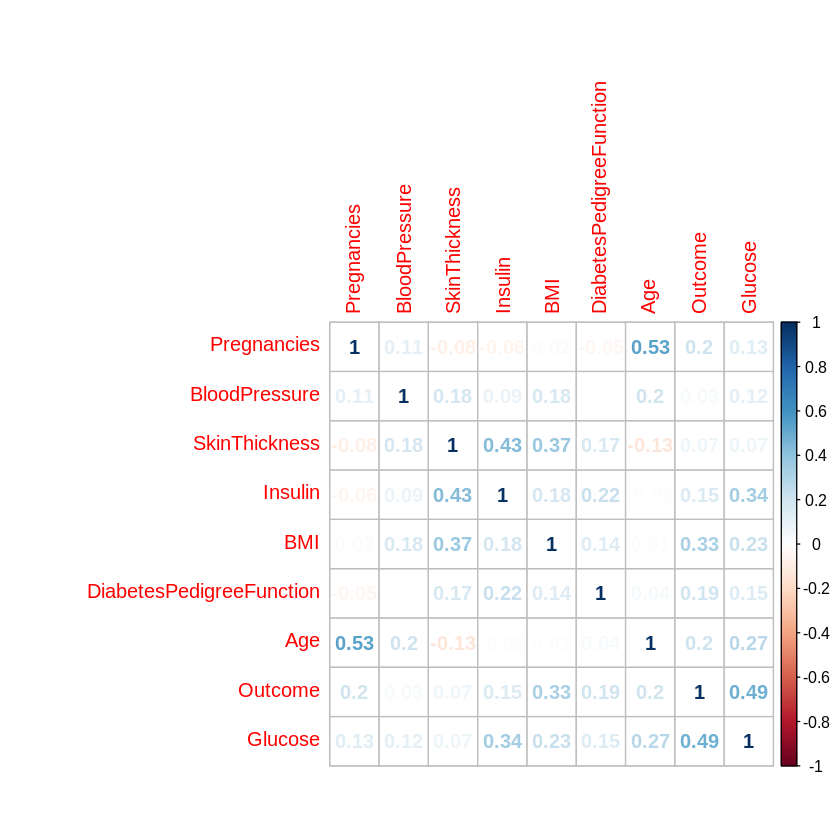

In [8]:
corrplot(M, method = "number")

## Multiple Linear Regression

### Linear regression is used to quantify the impact of features (or independent variables) on the dependent variable.

### In this case, features with a significance level of lower than 5% are kept in the model.

In [9]:
fit <- lm(Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + BMI + Insulin + SkinThickness + BloodPressure, data=diabetes1)
summary(fit) # show results


Call:
lm(formula = Glucose ~ Pregnancies + Outcome + Age + DiabetesPedigreeFunction + 
    BMI + Insulin + SkinThickness + BloodPressure, data = diabetes1)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.709 -18.148  -2.212  15.176  80.950 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              78.401064   6.363612  12.320  < 2e-16 ***
Pregnancies              -0.481865   0.363730  -1.325  0.18575    
Outcome                  25.590805   2.384153  10.734  < 2e-16 ***
Age                       0.527262   0.106097   4.970  8.8e-07 ***
DiabetesPedigreeFunction  0.052534   3.198192   0.016  0.98690    
BMI                       0.318452   0.167106   1.906  0.05718 .  
Insulin                   0.082208   0.009843   8.352  4.8e-16 ***
SkinThickness            -0.202236   0.077372  -2.614  0.00918 ** 
BloodPressure             0.083865   0.058081   1.444  0.14929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [10]:
df<-data.frame(Outcome, Age, Insulin, SkinThickness, Glucose)
attach(df)

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Max-Min Normalization

In [11]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf <- as.data.frame(lapply(df, normalize))
attach(maxmindf)
maxmindf<-as.matrix(maxmindf)

The following objects are masked from df:

    Age, Glucose, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Glucose, Insulin, Outcome, SkinThickness



## Train-validation split

In [12]:
ind <- sample(2, nrow(maxmindf), replace=TRUE, prob = c(0.7,0.3))

## Build X_train, y_train, X_val, y_val

In [13]:
X_train <- maxmindf[ind==1, 1:4]
X_val <- maxmindf[ind==2, 1:4]
y_train <- maxmindf[ind==1, 5]
y_val <- maxmindf[ind==2, 5]

# Neural Network

## Sequential model

In [14]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 12, activation = 'relu', kernel_initializer='RandomNormal', input_shape = c(4)) %>% 
  layer_dense(units = 8, activation = 'relu') %>%
  layer_dense(units = 1, activation = 'linear')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________


## Model compilation with mean squared error used as loss function

### Model trained over 30 epochs

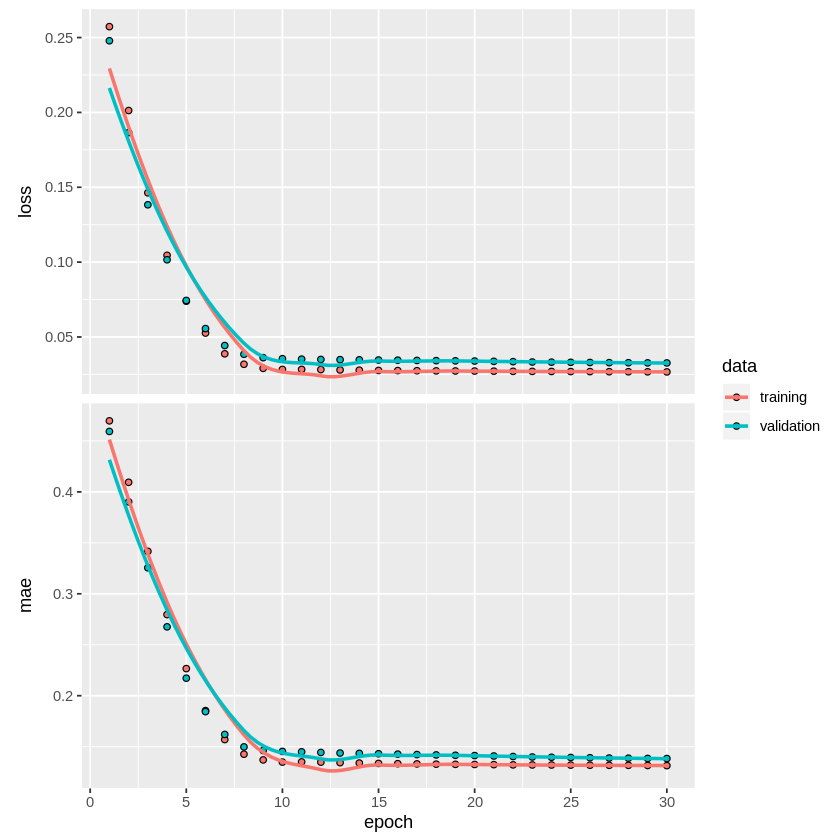

In [15]:
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = 'adam',
  metrics = c('mae')
)

history <- model %>% fit(
  X_train, y_train, 
  epochs = 30, batch_size = 50, 
  validation_split = 0.2
)

plot(history)

### Model evaluation

In [16]:
model %>% evaluate(X_val, y_val)
model
pred <- data.frame(y = predict(model, as.matrix(X_val)))
predicted=pred$y * abs(diff(range(df$Glucose))) + min(df$Glucose)
actual=y_val * abs(diff(range(df$Glucose))) + min(df$Glucose)
df<-data.frame(predicted,actual)
attach(df)

$loss
[1] 0.02634556

$mae
[1] 0.130291

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 12)                      60          
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       104         
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       9           
Total params: 173
Trainable params: 173
Non-trainable params: 0
________________________________________________________________________________



The following objects are masked _by_ .GlobalEnv:

    actual, predicted



## Glucose level predictions

In [17]:
predicted=as.matrix(predicted)
predicted

103.66589
103.15664
106.89097
112.37224
130.76591
130.82542
165.29743
135.85041
105.29379
104.21879
135.85041


In [18]:
actual

[1] 137 101  67 139 129 141 176 143 100  96 180 131  91 177 136 155 104  73
 [19] 106  87  83 144 179 143 181 119  71 116 143  91 146  73 152  74 132 117
 [37] 142 105 111 119  81 115 119 174 113 145 111 120  92 146 101 179 154 184
 [55] 125 122  91  99  92 130  86  87 109 168  91 102 120 164  90 148 159  82
 [73] 194 180  99  94 101  85 134 135 134 105 109  83 126  82 144  88 163 123
 [91] 105 197 121 112 112 100  89 129  88 129  99  96 136  99 184 118 151 108
[109]  87 105 155 152 147 108 126 106 162 197 147 132 138  94 171  89 124  88
[127] 154 123 150 114  85 114  81  87 119 123 124 112  81 148  96  78 125 129
[145] 139 189  95  95 102 147 156 103 187 124 145 158 117 114 183 105 123  80
[163] 122 131 161 112  96 139 126  85  92  71  84  99 115  90 173  74 137 141
[181]  95 108 131  90 111 181 136  92 120

## Mean percentage error - percentage difference between predicted and actual values

In [20]:
install.packages("MLmetrics")
library(MLmetrics)
MAPE(predicted, actual)

also installing the dependencies ‘gtools’, ‘gdata’, ‘caTools’, ‘gplots’, ‘ROCR’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



[1] 0.1688128

## EXERCISE

### pima-indians-diabetes2.csv contains the predictor variables for the test set.
### pima-indians-diabetes3.csv contains the dependent variables (or glucose readings) for the test set.

### Your task is to use the existing model to generate new predictions for this test set and calculate the mean percentage error on these new predictions.

### Run below for solution.

In [21]:
diabetes2<-read.csv("pima-indians-diabetes2.csv")
attach(diabetes2)

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 6):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Insulin,
    Outcome, Pregnancies, SkinThickness



In [22]:
diabetes2

Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
7,76,32,91,40.9,0.871,32,1
4,86,19,0,29.3,0.317,34,0
3,78,23,79,28.4,0.323,34,1
5,80,0,0,34.6,0.144,45,0
1,68,29,127,29.3,0.349,42,1
1,82,46,180,46.1,0.335,46,1
0,0,0,0,32.4,0.141,24,1
2,64,0,0,30.8,0.158,21,0
1,80,48,200,38.9,1.162,41,0


In [23]:
df2<-data.frame(Outcome, Age, Insulin, SkinThickness)
attach(df2)

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 7):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



In [24]:
df2

Outcome,Age,Insulin,SkinThickness
<int>,<int>,<int>,<int>
1,32,91,32
0,34,0,19
1,34,79,23
0,45,0,0
1,42,127,29
1,46,180,46
1,24,0,0
0,21,0,0
0,41,200,48


## Max-Min Normalization

In [25]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

maxmindf2 <- as.data.frame(lapply(df2, normalize))
attach(maxmindf2)

The following objects are masked from df2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes2:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from maxmindf:

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from df (pos = 8):

    Age, Insulin, Outcome, SkinThickness

The following objects are masked from diabetes1:

    Age, Insulin, Outcome, SkinThickness



## Using the predict function in R, generate predictions (pred_test) for the Glucose variable using maxmindf2

In [26]:
pred_test <- # Complete this line...
predicted_test = pred_test$y * abs(diff(range(diabetes1$Glucose))) + min(diabetes1$Glucose)
predicted_test

[1] 152.43654 109.98260 149.17965 108.72835 159.52518 172.23483 129.01369
  [8]  96.42223 140.51448  99.49876 126.20444 111.80488 113.34314  98.98600
 [15] 121.24248 108.23657  99.49876 128.31813 145.17833 147.01528 103.08804
 [22] 130.69126 115.22756 161.95654 127.98817 132.60298 150.23973 107.48668
 [29]  96.93499 159.13209 110.26661 116.83700  98.98600 151.33687 139.78154
 [36] 160.09264 108.26280 123.21345 111.16608 189.20950 110.65624 151.01153
 [43] 151.39342 120.52171 154.52101 119.49920 175.01695 100.05095 114.56251
 [50] 114.20651 127.98817 139.26879 116.14523 121.12265 132.93436 116.33242
 [57] 130.55195 147.73091 136.19225 167.45309  98.47325 126.94332  98.47325
 [64] 101.03702 116.82445 103.43577 129.87957 142.34531 106.67733 153.66699
 [71]  96.93499 124.77110  96.93499 150.54938 109.57053 107.41882 159.14997
 [78] 129.52643 122.25087 106.29258 124.24498 153.08157 143.37083 149.25562
 [85] 119.86840 129.99973 114.98762 101.54978 139.78154 101.54978  96.42223
 [92] 120.45326 102.57529 140.80704 107.26894 112.83039 128.07187 115.89768
 [99] 143.02335 113.29345  96.93499 108.72835 128.33133 117.71223 153.16835
[106]  97.96049 150.08673 115.53612 135.77319 184.01115 162.42698 108.82788
[113] 134.14123 116.82086 108.72835 179.32374 134.44592 117.13372 129.09482
[120] 125.72626 150.00504 107.01079 151.99605 102.06254 138.24327 120.71027
[127] 152.60556 118.87101 186.88528 164.90841 112.46207 151.05422 109.02499
[134] 119.43725 106.09548 118.48178 126.06568 122.13085 104.27838  97.44774
[141] 167.00897 118.96909 120.90033 143.88358 118.60640 142.34531 134.46811
[148]  96.42223 153.89408 125.27421 119.81419 142.62006 163.97873

## Loading test set - or unseen data for this purpose

In [27]:
diabetes3<-read.csv("pima-indians-diabetes3.csv")
diabetes3

Glucose
<int>
97
83
130
128
149
144
119
108
120


## Compare predicted values with actual values

In [28]:
actual_test = diabetes3$Glucose
df2<-data.frame(predicted_test,actual_test)
attach(df2)
df2

The following objects are masked _by_ .GlobalEnv:

    actual_test, predicted_test



predicted_test,actual_test
<dbl>,<int>
152.43654,97
109.98260,83
149.17965,130
108.72835,128
159.52518,149
172.23483,144
129.01369,119
96.42223,108
140.51448,120


## Mean percentage error calculation

In [29]:
MAPE(predicted_test, actual_test)

[1] 0.178384